In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyreadstat

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from itertools import combinations
import itertools


In [319]:
allFeatures_file_path = r"Z:\Active-Diagnose_CTE\Fargol_Analysis\all_fatures\custom_merged_20231117 - Copy.csv"
allFeatures = pd.read_csv(allFeatures_file_path)
allFeatures = pd.DataFrame(allFeatures)

# right_volume_file_path = r"Z:\Active-Diagnose_CTE\Fargol_Analysis\Volumetric_Analysis\rh_aparc_volume_20231117.csv"
# right_volume = pd.read_csv(right_volume_file_path)
# right_volume = pd.DataFrame(right_volume)


C:\Users\fargor\AppData\Local\Temp\ipykernel_26600\415427251.py:2: DtypeWarning: Columns (16,17,18,24,26,30,31,32,33,35,36,37,38,39,40,41,46,47,48,49,50,51,52,53,54,151,174,213,238,339,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,391,392,393,394,395,396,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,436,437,438,439,440,441,442,443,444,445,446,447,450,485,534,535,536,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,608,609,610,611,612,615,616,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646

In [320]:
allFeatures.head()


,subject_id,visit,checkin_bin,exposurebin,age_decade,racecat_combined,eduyears,totyr_foot,chiiseas_pf,chiiyrs_pf,...,stroketiaepi,stroketiaagefirst,stroketiaagerec,stroketiaprob,stroketiaprobdes,endarter,endarterage,bp_systolic,bp_diastolic,rFSRP
0,1001.0,1.0,2.0,1.0,1.0,5.0,16.0,7,4335.4,2167.7,...,.,.,.,.,NaN,0.0,.,131.0,81.0,0.01052
1,1002.0,1.0,2.0,1.0,1.0,5.0,15.0,14,10363.1,5708.1,...,.,.,.,.,NaN,0.0,.,135.0,74.0,0.01952
2,1003.0,1.0,2.0,1.0,1.0,5.0,18.0,12,6685.4,4863.9,...,.,.,.,.,NaN,0.0,.,135.0,89.0,0.01769
3,1004.0,1.0,1.0,1.0,2.0,5.0,16.0,16,7701.2,6448.9,...,.,.,.,.,NaN,0.0,.,117.0,82.0,0.01367
4,1005.0,1.0,3.0,0.0,2.0,5.0,21.0,.,.,.,...,.,.,.,.,NaN,0.0,.,148.0,94.0,0.03794


In [321]:
print("Column Names:")
print(allFeatures.columns[2])

Column Names:
checkin_bin


In [322]:
#group them base on the value in the third column which indicates their level of playing
allFeatures_grouped = allFeatures.groupby(allFeatures.iloc[:, 2])

NFL_allFeatures_grouped = pd.DataFrame()
CP_allFeatures_grouped = pd.DataFrame()
HC_allFeatures_grouped = pd.DataFrame()


# group_name : 1, 2, 3   group_data: 
for group_name, group_data in allFeatures_grouped:
    if group_name == 1:
        NFL_allFeatures_grouped = pd.concat([NFL_allFeatures_grouped,group_data], ignore_index = True)
    if group_name == 2:
        CP_allFeatures_grouped = pd.concat([CP_allFeatures_grouped,group_data], ignore_index = True)
    if group_name == 3:
        HC_allFeatures_grouped = pd.concat([HC_allFeatures_grouped,group_data], ignore_index = True)
    
#print("DataFrame for NFL:")
#print(NFL_right_grouped.head())
NFL_allFeatures_grouped.head()


,subject_id,visit,checkin_bin,exposurebin,age_decade,racecat_combined,eduyears,totyr_foot,chiiseas_pf,chiiyrs_pf,...,stroketiaepi,stroketiaagefirst,stroketiaagerec,stroketiaprob,stroketiaprobdes,endarter,endarterage,bp_systolic,bp_diastolic,rFSRP
0,1004.0,1.0,1.0,1.0,2.0,5.0,16.0,16,7701.2,6448.9,...,.,.,.,.,NaN,0.0,.,117.0,82.0,0.01367
1,1008.0,1.0,1.0,1.0,2.0,3.0,15.0,22,8220.9,5421.2,...,.,.,.,.,NaN,0.0,.,133.0,78.0,0.02836
2,1011.0,1.0,1.0,1.0,2.0,5.0,16.0,20,9307,9307,...,.,.,.,.,NaN,0.0,.,135.0,79.0,0.04273
3,1015.0,1.0,1.0,1.0,1.0,3.0,19.0,17,9866.7,6173.3,...,.,.,.,.,NaN,0.0,.,120.0,64.0,0.00905
4,1018.0,1.0,1.0,1.0,1.0,3.0,16.0,23,10635.9,7929.6,...,.,.,.,.,NaN,0.0,.,132.0,85.0,0.00932


In [323]:
index_of_chiiyrs_pg = NFL_allFeatures_grouped.columns.get_loc("chiiyrs_pg")
NFL_allFeatures_grouped.drop(columns=NFL_allFeatures_grouped.columns[[1] +list(range(3,index_of_chiiyrs_pg+1))], inplace = True)
CP_allFeatures_grouped.drop(columns=CP_allFeatures_grouped.columns[[1] +list(range(3,index_of_chiiyrs_pg+1))], inplace = True)
HC_allFeatures_grouped.drop(columns=HC_allFeatures_grouped.columns[[1] +list(range(3,index_of_chiiyrs_pg+1))], inplace = True)

NFL_allFeatures_grouped.head()


,subject_id,checkin_bin,testtest,DEM_AD8_Judgement,DEM_AD8_LessIntrst,DEM_AD8_Repeat,DEM_AD8_LrnGadget,DEM_AD8_ForgetMoYr,DEM_AD8_Financial,DEM_AD8_ForgetAppt,...,stroketiaepi,stroketiaagefirst,stroketiaagerec,stroketiaprob,stroketiaprobdes,endarter,endarterage,bp_systolic,bp_diastolic,rFSRP
0,1004.0,1.0,110.0,0.0,0,0,0,0.0,0.0,0.0,...,.,.,.,.,NaN,0.0,.,117.0,82.0,0.01367
1,1008.0,1.0,190.0,0.0,0,0,0,0.0,0.0,0.0,...,.,.,.,.,NaN,0.0,.,133.0,78.0,0.02836
2,1011.0,1.0,180.0,1.0,1,1,1,0.0,0.0,1.0,...,.,.,.,.,NaN,0.0,.,135.0,79.0,0.04273
3,1015.0,1.0,180.0,0.0,0,0,0,0.0,0.0,0.0,...,.,.,.,.,NaN,0.0,.,120.0,64.0,0.00905
4,1018.0,1.0,150.0,1.0,1,1,0,0.0,0.0,0.0,...,.,.,.,.,NaN,0.0,.,132.0,85.0,0.00932


In [324]:
#combine all three classes
combined_allFeatures = pd.concat([NFL_allFeatures_grouped, CP_allFeatures_grouped, HC_allFeatures_grouped], ignore_index=True)

combined_allFeatures.head()

,subject_id,checkin_bin,testtest,DEM_AD8_Judgement,DEM_AD8_LessIntrst,DEM_AD8_Repeat,DEM_AD8_LrnGadget,DEM_AD8_ForgetMoYr,DEM_AD8_Financial,DEM_AD8_ForgetAppt,...,stroketiaepi,stroketiaagefirst,stroketiaagerec,stroketiaprob,stroketiaprobdes,endarter,endarterage,bp_systolic,bp_diastolic,rFSRP
0,1004.0,1.0,110.0,0.0,0,0,0,0.0,0.0,0.0,...,.,.,.,.,NaN,0.0,.,117.0,82.0,0.01367
1,1008.0,1.0,190.0,0.0,0,0,0,0.0,0.0,0.0,...,.,.,.,.,NaN,0.0,.,133.0,78.0,0.02836
2,1011.0,1.0,180.0,1.0,1,1,1,0.0,0.0,1.0,...,.,.,.,.,NaN,0.0,.,135.0,79.0,0.04273
3,1015.0,1.0,180.0,0.0,0,0,0,0.0,0.0,0.0,...,.,.,.,.,NaN,0.0,.,120.0,64.0,0.00905
4,1018.0,1.0,150.0,1.0,1,1,0,0.0,0.0,0.0,...,.,.,.,.,NaN,0.0,.,132.0,85.0,0.00932


In [325]:
# Replace '.' with NaN
combined_allFeatures = combined_allFeatures.replace('.', np.nan)

# Convert all columns to numeric, forcing non-convertible values to NaN
for column in combined_allFeatures.columns:
    combined_allFeatures[column] = pd.to_numeric(combined_allFeatures[column], errors='coerce')

In [326]:
combined_allFeatures.head()

,subject_id,checkin_bin,testtest,DEM_AD8_Judgement,DEM_AD8_LessIntrst,DEM_AD8_Repeat,DEM_AD8_LrnGadget,DEM_AD8_ForgetMoYr,DEM_AD8_Financial,DEM_AD8_ForgetAppt,...,stroketiaepi,stroketiaagefirst,stroketiaagerec,stroketiaprob,stroketiaprobdes,endarter,endarterage,bp_systolic,bp_diastolic,rFSRP
0,1004.0,1.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,117.0,82.0,0.01367
1,1008.0,1.0,190.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,133.0,78.0,0.02836
2,1011.0,1.0,180.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,135.0,79.0,0.04273
3,1015.0,1.0,180.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,120.0,64.0,0.00905
4,1018.0,1.0,150.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,132.0,85.0,0.00932


In [327]:
# Remove columns with >10 NaNs
print("Size before:", combined_allFeatures.shape)

nan_counts = combined_allFeatures.isna().sum()

columns_to_drop = nan_counts[nan_counts > 15].index

combined_allFeatures_filtered = combined_allFeatures.drop(columns=columns_to_drop)

print("Size after:", combined_allFeatures_filtered.shape)
combined_allFeatures = combined_allFeatures_filtered
print("Size after:", combined_allFeatures.shape)


Size before: (236, 7062)
Size after: (236, 4365)
Size after: (236, 4365)


In [328]:
combined_allFeatures.head()

,subject_id,checkin_bin,testtest,DEM_AD8_Judgement,DEM_AD8_LessIntrst,DEM_AD8_Repeat,DEM_AD8_LrnGadget,DEM_AD8_ForgetMoYr,DEM_AD8_Financial,DEM_AD8_ForgetAppt,...,stroketia,stroketiatype___1,stroketiatype___2,stroketiatype___3,stroketiatype___999,stroketiatype___777,endarter,bp_systolic,bp_diastolic,rFSRP
0,1004.0,1.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,82.0,0.01367
1,1008.0,1.0,190.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,133.0,78.0,0.02836
2,1011.0,1.0,180.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,135.0,79.0,0.04273
3,1015.0,1.0,180.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,64.0,0.00905
4,1018.0,1.0,150.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,132.0,85.0,0.00932


In [329]:
# Remove NaNs
# print("Size before:", combined_allFeatures.shape)
# combined_allFeatures.dropna(inplace=True)
# print("Size after:", combined_allFeatures.shape)

In [330]:
#combined_allFeatures.head()

In [331]:
# Replace NaNs with means
print("Size before:", combined_allFeatures.shape)
combined_allFeatures.fillna(combined_allFeatures.mean(), inplace=True)
print("Size after:", combined_allFeatures.shape)

Size before: (236, 4365)
Size after: (236, 4365)


In [332]:
numerical_combined_allFeatures = combined_allFeatures.select_dtypes(include=['number'])
numerical_combined_allFeatures.head()

,subject_id,checkin_bin,testtest,DEM_AD8_Judgement,DEM_AD8_LessIntrst,DEM_AD8_Repeat,DEM_AD8_LrnGadget,DEM_AD8_ForgetMoYr,DEM_AD8_Financial,DEM_AD8_ForgetAppt,...,stroketia,stroketiatype___1,stroketiatype___2,stroketiatype___3,stroketiatype___999,stroketiatype___777,endarter,bp_systolic,bp_diastolic,rFSRP
0,1004.0,1.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,82.0,0.01367
1,1008.0,1.0,190.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,133.0,78.0,0.02836
2,1011.0,1.0,180.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,135.0,79.0,0.04273
3,1015.0,1.0,180.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,64.0,0.00905
4,1018.0,1.0,150.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,132.0,85.0,0.00932


In [333]:
# Separate based on the level of professionalism
X = combined_allFeatures.drop(columns=['subject_id','checkin_bin']) 
y = combined_allFeatures['checkin_bin']

In [334]:
X.head()

,testtest,DEM_AD8_Judgement,DEM_AD8_LessIntrst,DEM_AD8_Repeat,DEM_AD8_LrnGadget,DEM_AD8_ForgetMoYr,DEM_AD8_Financial,DEM_AD8_ForgetAppt,DEM_AD8_ThinkMem,ad8tot,...,stroketia,stroketiatype___1,stroketiatype___2,stroketiatype___3,stroketiatype___999,stroketiatype___777,endarter,bp_systolic,bp_diastolic,rFSRP
0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,82.0,0.01367
1,190.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,133.0,78.0,0.02836
2,180.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,135.0,79.0,0.04273
3,180.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,64.0,0.00905
4,150.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,132.0,85.0,0.00932


In [335]:
X.shape

(236, 4363)

In [336]:
selected_features = X[["testtest"]] #,"concussfreqn", "TES_substan_RHI","tes_subtype", "ccisptot","SP_MC_CCI_OthersThink","partsport","RD_FX"]]

In [337]:
selected_features.shape

(236, 1)

In [338]:
X = selected_features

In [339]:
X.shape

(236, 1)

In [340]:
y

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
231    3.0
232    3.0
233    3.0
234    3.0
235    3.0
Name: checkin_bin, Length: 236, dtype: float64

In [341]:
combined_allFeatures_filtered.head()
allFeatures_filtered = combined_allFeatures_filtered
allFeatures_filtered.head()
print(allFeatures_filtered.shape)

(236, 4365)


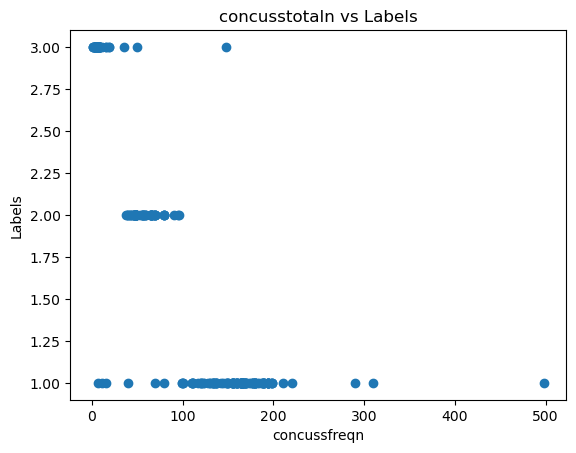

In [343]:
#feature_concusstotaln = X["concussfreqn","concussfreqn"]

plt.scatter(X, y)
plt.xlabel("concussfreqn")
plt.ylabel("Labels")
plt.title("concusstotaln vs Labels")
plt.show()

In [344]:
X.shape

(236, 1)

In [345]:
y.shape

(236,)

In [304]:
# X_filtered = X[X["concusstotaln"] <= 3000]
# y_filtered = y[X["concusstotaln"] <= 3000]
X_filtered = X[(y ==3) | (y == 1)]
y_filtered = y[(y ==3) | (y == 1)]

X_filtered
y_filtered

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
231    3.0
232    3.0
233    3.0
234    3.0
235    3.0
Name: checkin_bin, Length: 176, dtype: float64

In [305]:
X_filtered.shape

(176, 2)

In [306]:
y_filtered.shape

(176,)

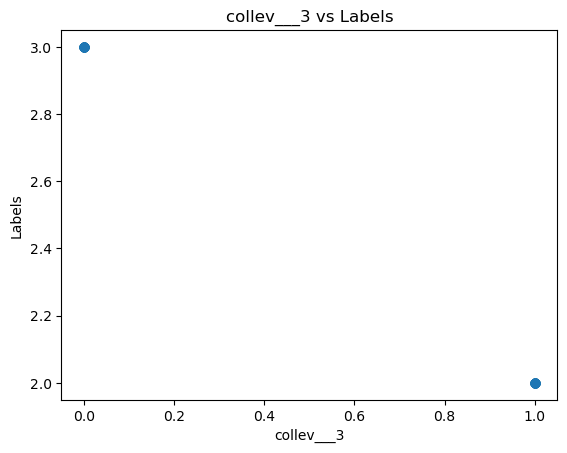

In [243]:
feature_concusstotaln = X_filtered

plt.scatter(X_filtered, y_filtered)
plt.xlabel("collev___3")
plt.ylabel("Labels")
plt.title("collev___3 vs Labels")
plt.show()

In [179]:
feature_concusstotaln = X_filtered["concusstotaln"]

plt.scatter(feature_concusstotaln, y_filtered)
plt.xlabel("concusstotaln")
plt.ylabel("Labels")
plt.title("concusstotaln vs Labels")
plt.show()

KeyError: 'concusstotaln'

In [307]:
X = X_filtered
y = y_filtered

In [346]:
# Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [347]:
# Normalization
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [348]:
scaled_X = scaler.fit_transform(X_train)
scaled_X = pd.DataFrame(scaled_X,columns= X.columns)
# scaled_X

In [349]:
# feature_concusstotaln = scaled_X["concusstotaln"]

# plt.scatter(feature_concusstotaln, y)
# plt.xlabel("concusstotaln")
# plt.ylabel("Labels")
# plt.title("concusstotaln vs Labels")
# plt.show()

In [350]:
X_train =pd.DataFrame(X_train_scaled,columns= X.columns)
X_test = pd.DataFrame(X_test_scaled, columns= X.columns)

In [351]:
# RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# store evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average = 'weighted')
recall = recall_score(y_test, y_pred, average = 'weighted')
f1 = f1_score(y_test, y_pred, average = 'weighted')
print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, f1:{f1}")

Accuracy: 0.9375, Precision: 0.9419642857142856, Recall: 0.9375, f1:0.9380511463844797


In [352]:
y_pred2  = model.predict(X_train_scaled)

accuracy_train = accuracy_score(y_train, y_pred2)
precision_bagging = precision_score(y_train, y_pred2, average='weighted')
recall_bagging = recall_score(y_train, y_pred2, average='weighted')
f1_bagging = f1_score(y_train, y_pred2, average='weighted')

print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, f1:{f1}")
# print(f"Accuracy: {accuracy}")


Accuracy: 0.9375, Precision: 0.9419642857142856, Recall: 0.9375, f1:0.9380511463844797


C:\Users\fargor\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [353]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming X is your feature matrix and y is your target vector
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

# Generate train sizes as fractions, excluding 1.0 to avoid the error
train_sizes = np.linspace(0.1, 120, 20)
train_errors = []
val_errors = []



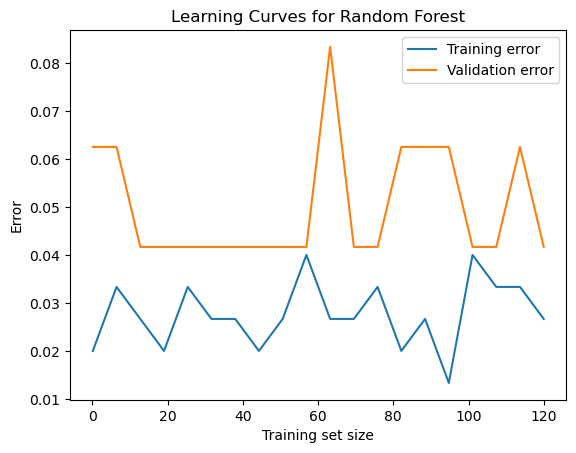

In [354]:

for train_size in train_sizes:
    X_train_subset, _, y_train_subset, _ = train_test_split(X_train, y_train, train_size=0.8)#train_size)
    model = RandomForestClassifier(n_estimators=100)
    model.fit(X_train_subset, y_train_subset)
    
    train_predictions = model.predict(X_train_subset)
    val_predictions = model.predict(X_val)
    
    train_errors.append(1 - accuracy_score(y_train_subset, train_predictions))
    val_errors.append(1 - accuracy_score(y_val, val_predictions))

plt.plot(train_sizes, train_errors, label='Training error')
plt.plot(train_sizes, val_errors, label='Validation error')
plt.xlabel('Training set size')
plt.ylabel('Error')
plt.title('Learning Curves for Random Forest')
plt.legend()
plt.show()

In [271]:
importances = model.feature_importances_

feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})

feature_importances_sorted = feature_importances.sort_values(by='importance', ascending=False)

print(feature_importances_sorted)

      feature  importance
0  collev___3         1.0


In [141]:
file_path = r"Z:\Active-Diagnose_CTE\Fargol_Analysis\all_fatures\feature_importances.csv"
#feature_importances_sorted.to_csv(file_path, index=False)

## Feature IMportancee

In [200]:

allFeatures_filtered.head()
print(allFeatures_filtered.get('checkin_bin'))
allFeatures_filtered['checkin_bin'].value_counts()

0      1
1      1
2      1
3      1
4      1
      ..
231    3
232    3
233    3
234    3
235    3
Name: checkin_bin, Length: 236, dtype: int64


1    120
2     60
3     56
Name: checkin_bin, dtype: int64

# Re-run after removing  the topp 10 features

In [208]:
# Separate based on the level of professionalism
# X = combined_allFeatures.drop(columns=['subject_id','checkin_bin' , 'collev___3' , 'concusstotaln', 'concussfreqn' , 'TES_substan_RHI','tes_subtype','']) 
# y = combined_allFeatures['checkin_bin']
X = combined_allFeatures.drop(columns=['subject_id','checkin_bin', 'collev___3', 'concusstotaln', 'concussfreqn' , 'TES_substan_RHI','tes_subtype']) 
y = combined_allFeatures['checkin_bin']

In [209]:
X.head()

,DEM_AD8_Judgement,DEM_AD8_LessIntrst,DEM_AD8_Repeat,DEM_AD8_LrnGadget,DEM_AD8_ForgetMoYr,DEM_AD8_Financial,DEM_AD8_ForgetAppt,DEM_AD8_ThinkMem,ad8tot,SP_DEM_AD8_Judgement,...,stroketia,stroketiatype___1,stroketiatype___2,stroketiatype___3,stroketiatype___999,stroketiatype___777,endarter,bp_systolic,bp_diastolic,rFSRP
0,0,0.0,0.0,0.0,0,0,0,0,0,1.0,...,0,0,0,0,0,0,0,117,82,0.01367
1,0,0.0,0.0,0.0,0,0,0,0,0,1.0,...,0,0,0,0,0,0,0,133,78,0.02836
2,1,1.0,1.0,1.0,0,0,1,1,6,1.0,...,0,0,0,0,0,0,0,135,79,0.04273
3,0,0.0,0.0,0.0,0,0,0,0,0,0.0,...,0,0,0,0,0,0,0,120,64,0.00905
4,1,1.0,1.0,0.0,0,0,0,1,4,0.0,...,0,0,0,0,0,0,0,132,85,0.00932


In [210]:
X.shape

(236, 4357)

In [211]:
# combined_allFeatures_filtered.head()
# allFeatures_filtered = combined_allFeatures_filtered
# allFeatures_filtered.head()
# print(allFeatures_filtered.shape)

(236, 4364)


In [256]:
# Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [257]:
# Normalization
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [258]:
X_train =pd.DataFrame(X_train_scaled,columns= X.columns)
X_test = pd.DataFrame(X_test_scaled, columns= X.columns)

In [259]:
# RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# store evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average = 'weighted')
recall = recall_score(y_test, y_pred, average = 'weighted')
f1 = f1_score(y_test, y_pred, average = 'weighted')
print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, f1:{f1}")

Accuracy: 0.7291666666666666, Precision: 0.7208333333333333, Recall: 0.7291666666666666, f1:0.671760531135531


In [261]:
y_pred2  = model.predict(X_train_scaled)

accuracy_train = accuracy_score(y_train, y_pred2)
precision_bagging = precision_score(y_train, y_pred2, average='weighted')
recall_bagging = recall_score(y_train, y_pred2, average='weighted')
f1_bagging = f1_score(y_train, y_pred2, average='weighted')

print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, f1:{f1}")
# print(f"Accuracy: {accuracy}")


Accuracy: 0.7291666666666666, Precision: 0.7208333333333333, Recall: 0.7291666666666666, f1:0.671760531135531


C:\Users\fargor\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [266]:
# try to see the values of CCI Study Partner Total Score for Healthy control (check_bin = 3)

combined_allFeatures_ccisptot = combined_allFeatures[combined_allFeatures['checkin_bin'] == 3]

# Calculate the average and standard deviation of the correlated column
average = combined_allFeatures_ccisptot['ccisptot'].mean()
standard_deviation = combined_allFeatures_ccisptot['ccisptot'].std()

print("Average:", average)
print("Standard Deviation:", standard_deviation)

Average: 13.178571428571429
Standard Deviation: 2.0723911780369066


## Try Bagging


In [15]:
from sklearn.ensemble import BaggingClassifier

bagging_model = BaggingClassifier(estimator=RandomForestClassifier(n_estimators=100, random_state=42),
                                  n_estimators=10, random_state=42)


bagging_model.fit(X_train, y_train)
    
y_pred_bagging = bagging_model.predict(X_test)

accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
precision_bagging = precision_score(y_test, y_pred_bagging, average='weighted')
recall_bagging = recall_score(y_test, y_pred_bagging, average='weighted')
f1_bagging = f1_score(y_test, y_pred_bagging, average='weighted')

print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, f1:{f1}")

Accuracy: 0.46875, Precision: 0.5673076923076923, Recall: 0.46875, f1:0.4021802325581395


In [16]:
y_test

146    2
102    1
119    1
110    1
174    2
44     1
143    2
204    3
142    2
214    3
30     1
136    2
26     1
192    3
38     1
45     1
184    3
151    2
232    3
113    1
148    2
29     1
23     1
17     1
47     1
161    2
101    1
85     1
79     1
147    2
68     1
227    3
Name: checkin_bin, dtype: int64

## Try XGBoost

In [17]:
from xgboost import XGBClassifier


## Try XGBoost

In [18]:
X = combined_allFeatures.drop(columns=['subject_id','checkin_bin']) 
y = combined_allFeatures['checkin_bin']

In [19]:
y

3      1
5      1
6      1
8      1
9      1
      ..
231    3
232    3
233    3
234    3
235    3
Name: checkin_bin, Length: 156, dtype: int64

In [20]:
# Since for XGBoost, the y values should start at 0, you need to do some justification
y = y-1

In [21]:
y

3      0
5      0
6      0
8      0
9      0
      ..
231    2
232    2
233    2
234    2
235    2
Name: checkin_bin, Length: 156, dtype: int64

In [22]:
# Do the splitting again to make sure that this adjustemnt is applied to your new X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Normalization
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train =pd.DataFrame(X_train_scaled,columns= X.columns)
X_test = pd.DataFrame(X_test_scaled, columns= X.columns)

In [23]:
X_test.head()

,c_dhpg,c_ne,c_dopa,c_da,c_dopac,c_catecholamine_flag_blood_dv,c_catecholamine_flag_diluted_dv
0,0.641253,0.946755,0.002971,0.020749,1.039024,0.0,0.0
1,0.114351,0.052382,0.001241,0.002190,0.197893,0.0,0.0
2,0.241559,0.131131,0.000673,0.002054,0.117367,0.0,0.0
3,0.385711,0.099996,0.000527,0.001159,0.234794,0.0,0.0
4,0.227201,0.292102,0.001439,0.004748,0.316198,0.0,0.0


In [25]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=100, random_state=42)

xgb_model.fit(X_train, y_train)
    
y_pred_xgb = xgb_model.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb, average='weighted')
recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted')
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')

print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, f1:{f1}")



Accuracy: 0.46875, Precision: 0.5673076923076923, Recall: 0.46875, f1:0.4021802325581395


In [ ]:
y_pred2  = best_model.predict(X_train_scaled)

accuracy_train = accuracy_score(y_train, y_pred2)
precision_bagging = precision_score(y_train, y_pred2, average='weighted')
recall_bagging = recall_score(y_train, y_pred2, average='weighted')
f1_bagging = f1_score(y_train, y_pred2, average='weighted')

print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, f1:{f1}")
# print(f"Accuracy: {accuracy}")
